# figuring out how to generate correlated random variables using Choletsky decomposition

In [4]:
import numpy as np 
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline 

In [21]:
X = np.random.randn(10) # N(mu=0, sig=1.)

In [42]:
C = [[1, 0.99], [0.99, 1]]
L = np.linalg.cholesky(C)

In [54]:
print L

[[ 1.          0.        ]
 [ 0.99        0.14106736]]


In [43]:
XY = np.random.randn(2, 1000)
XY_corr = np.dot(L, XY)

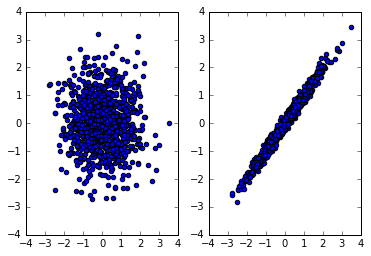

In [44]:
fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

In [59]:
XY = np.zeros((2, 10000))
XY[0,:] = 0.2*np.random.randn(10000)
XY[1,:] = np.random.randn(10000)

XY_corr = np.dot(L, XY)

[[ 0.04039792  0.03986866]
 [ 0.03986866  0.0591068 ]]


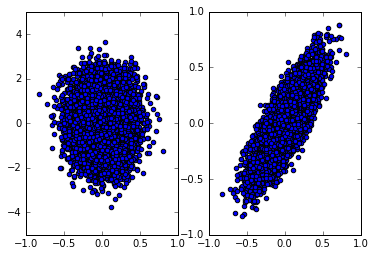

In [60]:
fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

print np.cov(XY_corr)

[[ 0.33080665  0.32817455]
 [ 0.32817455  0.34548429]]


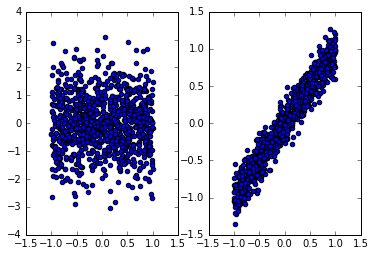

In [51]:
XY = np.zeros((2, 1000))
XY[0,:] = np.random.uniform(-1., 1., size=1000)
XY[1,:] = np.random.randn(1000)

XY_corr = np.dot(L, XY)

fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

print np.cov(XY_corr)

[[ 0.32914165  0.32494932]
 [ 0.32494932  0.32756573]]
[ 0.75421532 -0.92180143  0.82129029  0.64198518  0.57743981  0.90862451
  0.2901537   0.61460926  0.1504659   0.77255677]
[ 0.75421532 -0.92180143  0.82129029  0.64198518  0.57743981  0.90862451
  0.2901537   0.61460926  0.1504659   0.77255677]


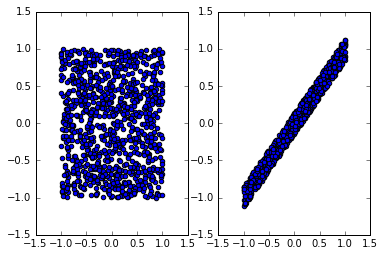

In [53]:
XY = np.zeros((2, 1000))
XY[0,:] = np.random.uniform(-1., 1., size=1000)
XY[1,:] = np.random.uniform(-1., 1., 1000)

XY_corr = np.dot(L, XY)

fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

print np.cov(XY_corr)
print XY[0,:10]
print XY_corr[0,:10]

# Lets try changing around C

[[ 0.04016586  0.00864898]
 [ 0.00864898  0.26108621]]


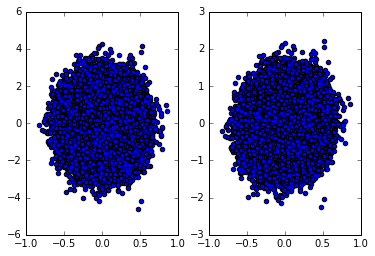

In [70]:
C = [[1., 0.2], [0.2, 0.3]]
L = np.linalg.cholesky(C)

XY = np.zeros((2, 100000))
XY[0,:] = 0.2*np.random.randn(100000)#-1., 1., size=1000)
XY[1,:] = np.random.randn(100000)#(-1., 1., 1000)

XY_corr = np.dot(L, XY)

fig = plt.figure()
sub = fig.add_subplot(1,2,1)
sub.scatter(XY[0,:], XY[1,:])
sub = fig.add_subplot(1,2,2)
sub.scatter(XY_corr[0,:], XY_corr[1,:])

print np.cov(XY_corr)

## Instead of Choletsky, we can use the error function
$$i_{rank} = \frac{1}{2} \left[1 - {\rm erf}(x / \sqrt{2}) \right]$$
where 
$$ x = \frac{SFR - <SFR>}{\sigma_{log SFR}}$$


In [1]:
from scipy.special import erfinv

(-1.0, 1.0)

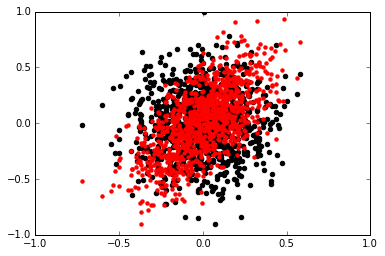

In [16]:
# scratch pad trying to figure out how assembly bias is induced
dMhalo = 0.2*np.random.randn(1000)
isort = np.argsort(dMhalo)

irank = np.zeros(1000)
irank[isort] = np.arange(1000) + 0.5
irank /= 1000.

#dlogSFR = 0.2 * 1.414 * erfinv(1. - 2. * irank) + np.sqrt(0.3**2 - 0.2**2) * np.random.randn(1000)
dlogSFR = 0.2 * 1.414 * erfinv(2. * irank - 1.) + np.sqrt(0.3**2 - 0.2**2) * np.random.randn(1000)

plt.scatter(dMhalo, 0.3*np.random.randn(1000), c='k')
plt.scatter(dMhalo, dlogSFR, c='r', lw=0)
plt.xlim([-1, 1])
plt.ylim([-1., 1.])

0.306870235329


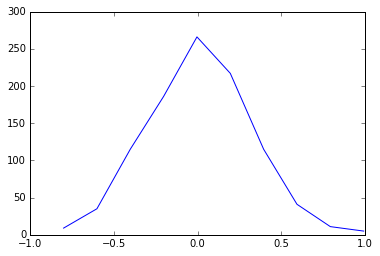

In [17]:
p_dlogSFR, dlogSFR_bin = np.histogram(dlogSFR)

plt.plot(0.5*(dlogSFR_bin[:-1] + dlogSFR_bin[1:]), p_dlogSFR)
plt.xlim([-1., 1.])
print np.std(dlogSFR)